this notebook takes the first example from rnaglib and runs the model with different optimizers (Adam and Adagrad) as well as test different lr (0.001 and 0.5) and plots the loss 

train_supervised function from learning

In [1]:
import torch
print(dir(torch.optim))


['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


In [1]:
#!/usr/bin/env python3

import torch

from rnaglib.learning import models, learn
from rnaglib.data_loading import rna_dataset, rna_loader
from rnaglib.representations import GraphRepresentation

"""
This script just shows a first very basic example : learn binding protein preferences 
from the nucleotide types and the graph structure

To do so, we choose our data, create a data loader around it, build a RGCN model and train it.
"""

if __name__ == "__main__":
    # Choose the data, features and targets to use and GET THE DATA GOING
    node_features = ['nt_code']
    node_target = ['binding_protein']
    graph_rep = GraphRepresentation(framework='dgl')
    supervised_dataset = rna_dataset.RNADataset(nt_features=node_features, nt_targets=node_target,
                                                representations=[graph_rep])
    train_loader, validation_loader, test_loader = rna_loader.get_loader(dataset=supervised_dataset)

    # Define a model, we first embed our data in 10 dimensions, and then add one classification
    input_dim, target_dim = supervised_dataset.input_dim, supervised_dataset.output_dim
    embedder_model = models.Embedder(dims=[10, 10], infeatures_dim=input_dim)
    classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[target_dim])

    # Finally get the training going
    optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.001)
    # learn.train_supervised(model=classifier_model,
    #                        optimizer=optimizer,
    #                        train_loader=train_loader)


Dataset was found and not overwritten


here I used another optimizer, Adagrad

In [3]:
#!/usr/bin/env python3

import torch

from rnaglib.learning import models, learn
from rnaglib.data_loading import rna_dataset, rna_loader
from rnaglib.representations import GraphRepresentation

"""
This script just shows a first very basic example : learn binding protein preferences 
from the nucleotide types and the graph structure

To do so, we choose our data, create a data loader around it, build a RGCN model and train it.
"""

if __name__ == "__main__":
    # Choose the data, features and targets to use and GET THE DATA GOING
    node_features = ['nt_code']
    node_target = ['binding_protein']
    graph_rep = GraphRepresentation(framework='dgl')
    supervised_dataset = rna_dataset.RNADataset(nt_features=node_features, nt_targets=node_target,
                                                representations=[graph_rep])
    train_loader, validation_loader, test_loader = rna_loader.get_loader(dataset=supervised_dataset)

    # Define a model, we first embed our data in 10 dimensions, and then add one classification
    input_dim, target_dim = supervised_dataset.input_dim, supervised_dataset.output_dim
    embedder_model = models.Embedder(dims=[10, 10], infeatures_dim=input_dim)
    classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[target_dim])

    # Finally get the training going
    optimizer = torch.optim.Adagrad(classifier_model.parameters(), lr=0.001)
    # learn.train_supervised(model=classifier_model,
                        #    optimizer=optimizer,
                        #    train_loader=train_loader)


Dataset was found and not overwritten


here I used Adam optimizer but increases the lr to 0.5

In [ ]:
#!/usr/bin/env python3

import torch

from rnaglib.learning import models, learn
from rnaglib.data_loading import rna_dataset, rna_loader
from rnaglib.representations import GraphRepresentation

"""
This script just shows a first very basic example : learn binding protein preferences 
from the nucleotide types and the graph structure

To do so, we choose our data, create a data loader around it, build a RGCN model and train it.
"""

if __name__ == "__main__":
    # Choose the data, features and targets to use and GET THE DATA GOING
    node_features = ['nt_code']
    node_target = ['binding_protein']
    graph_rep = GraphRepresentation(framework='dgl')
    supervised_dataset = rna_dataset.RNADataset(nt_features=node_features, nt_targets=node_target,
                                                representations=[graph_rep])
    train_loader, validation_loader, test_loader = rna_loader.get_loader(dataset=supervised_dataset)

    # Define a model, we first embed our data in 10 dimensions, and then add one classification
    input_dim, target_dim = supervised_dataset.input_dim, supervised_dataset.output_dim
    embedder_model = models.Embedder(dims=[10, 10], infeatures_dim=input_dim)
    classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[target_dim])

    # Finally get the training going
    optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.5)
    learn.train_supervised(model=classifier_model,
                           optimizer=optimizer,
                           train_loader=train_loader)


Dataset was found and not overwritten
Train Epoch: 1 [1/84 (1%)]	Loss: 5.402839  Time: 0.05
Train Epoch: 1 [21/84 (25%)]	Loss: 12.969813  Time: 2.70
Train Epoch: 1 [41/84 (49%)]	Loss: 1.762604  Time: 7.51
Train Epoch: 1 [61/84 (73%)]	Loss: 0.182405  Time: 9.76
Train Epoch: 1 [81/84 (96%)]	Loss: 1.822942  Time: 12.31
Train Epoch: 2 [1/84 (1%)]	Loss: 1.642954  Time: 13.43
Train Epoch: 2 [21/84 (25%)]	Loss: 0.278313  Time: 16.16
Train Epoch: 2 [41/84 (49%)]	Loss: 0.315592  Time: 19.97
Train Epoch: 2 [61/84 (73%)]	Loss: 0.270255  Time: 22.57
Train Epoch: 2 [81/84 (96%)]	Loss: 0.842609  Time: 25.52
Train Epoch: 3 [1/84 (1%)]	Loss: 0.269375  Time: 26.10
Train Epoch: 3 [21/84 (25%)]	Loss: 1.735049  Time: 29.43
Train Epoch: 3 [41/84 (49%)]	Loss: 0.340293  Time: 31.41
Train Epoch: 3 [61/84 (73%)]	Loss: 1.557672  Time: 36.48
Train Epoch: 3 [81/84 (96%)]	Loss: 3.097146  Time: 39.15
Train Epoch: 4 [1/84 (1%)]	Loss: 1.288557  Time: 39.25
Train Epoch: 4 [21/84 (25%)]	Loss: 2.584188  Time: 43.24
Trai

Dataset was found and not overwritten
Train Epoch: 1 [1/86 (1%)]	Loss: 1.607608  Time: 0.30
Train Epoch: 1 [21/86 (24%)]	Loss: 0.888872  Time: 6.71
Train Epoch: 1 [41/86 (48%)]	Loss: 0.458632  Time: 10.89
Train Epoch: 1 [61/86 (71%)]	Loss: 0.499890  Time: 17.06
Train Epoch: 1 [81/86 (94%)]	Loss: 0.404077  Time: 23.01
Train Epoch: 2 [1/86 (1%)]	Loss: 0.476767  Time: 23.75
Train Epoch: 2 [21/86 (24%)]	Loss: 0.433779  Time: 30.70
Train Epoch: 2 [41/86 (48%)]	Loss: 0.269538  Time: 35.07
Train Epoch: 2 [61/86 (71%)]	Loss: 0.304448  Time: 39.45
Train Epoch: 2 [81/86 (94%)]	Loss: 0.332605  Time: 44.20


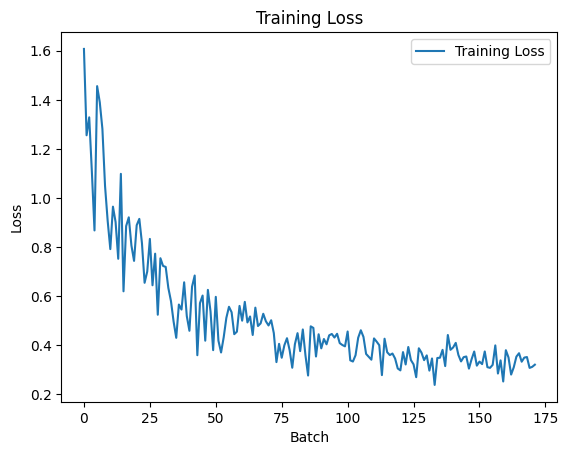

Train Epoch: 1 [1/86 (1%)]	Loss: 0.298817  Time: 0.05
Train Epoch: 1 [21/86 (24%)]	Loss: 0.301581  Time: 2.82
Train Epoch: 1 [41/86 (48%)]	Loss: 0.289049  Time: 8.24
Train Epoch: 1 [61/86 (71%)]	Loss: 0.351795  Time: 13.93
Train Epoch: 1 [81/86 (94%)]	Loss: 0.265332  Time: 19.14
Train Epoch: 2 [1/86 (1%)]	Loss: 0.285399  Time: 21.78
Train Epoch: 2 [21/86 (24%)]	Loss: 0.337454  Time: 25.84
Train Epoch: 2 [41/86 (48%)]	Loss: 0.350805  Time: 30.81
Train Epoch: 2 [61/86 (71%)]	Loss: 0.313598  Time: 35.95
Train Epoch: 2 [81/86 (94%)]	Loss: 0.278206  Time: 41.76


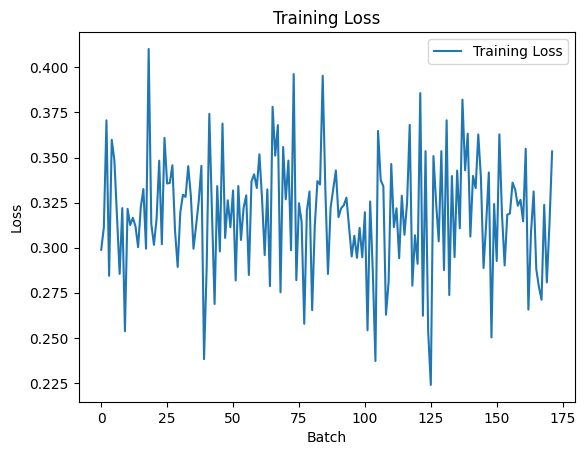

In [7]:
import os
import sys
import time

import networkx as nx
import numpy as np
from sklearn.metrics import roc_auc_score

import torch
import torch.nn.functional as F
import dgl
from rnaglib.config.graph_keys import GRAPH_KEYS, TOOL
from rnaglib.utils import misc
from rnaglib.learning import learning_utils
import matplotlib.pyplot as plt
def train_supervised(model,
                     optimizer,
                     train_loader,
                     learning_routine=learning_utils.LearningRoutine()):
    """
    Performs the entire training routine for a supervised task

    :param model: The model to train
    :param optimizer: the optimizer to use (eg SGD or Adam)
    :param train_loader: The loader to use for training, as defined in data_loading/GraphLoader
    :param learning_routine: A LearningRoutine object, if we want to also use a validation phase and early stopping

    :return: The best loss obtained
    """
    device = model.current_device

    start_time = time.time()
    losses = []
    # for epoch in range(learning_routine.num_epochs):
    for epoch in range(2):

        # Training phase
        model.train()
        running_loss = 0.0
        num_batches = len(train_loader)

        for batch_idx, batch in enumerate(train_loader):
            # Get data on the devices
            graph = batch['graph']
            graph = learning_utils.send_graph_to_device(graph, device)

            # Do the computations for the forward pass
            out = model(graph)
            labels = graph.ndata['nt_targets']
            loss = torch.nn.MSELoss()(out, labels)

            # Backward
            loss.backward()
            optimizer.step()
            model.zero_grad()

            # Metrics
            loss = loss.item()
            running_loss += loss
            losses.append(loss)

            if batch_idx % learning_routine.print_each == 0:
                time_elapsed = time.time() - start_time
                print(
                    f'Train Epoch: {epoch + 1} [{(batch_idx + 1)}/{num_batches} '
                    f'({100. * (batch_idx + 1) / num_batches:.0f}%)]\t'
                    f'Loss: {loss:.6f}  Time: {time_elapsed:.2f}')

                # tensorboard logging
                if learning_routine.writer is not None:
                    step = epoch * num_batches + batch_idx
                    learning_routine.writer.add_scalar("Training loss", loss, step)

        train_loss = running_loss / num_batches
        if learning_routine.writer is not None:
            learning_routine.writer.add_scalar("Training epoch loss", train_loss, epoch)

        # Test phase, if we do not have a validation, just iterate.
        # Otherwise call the routines.
        if learning_routine.validation_loader is None:
            early_stop = learning_routine.early_stopping_routine(validation_loss=train_loss, epoch=epoch,
                                                                 model=model, optimizer=optimizer)
        else:
            validation_loss = learning_utils.evaluate_model_supervised(model,
                                                                       loader=learning_routine.validation_loader)
            if learning_routine.writer is not None:
                learning_routine.writer.add_scalar("Validation loss during training", validation_loss, epoch)
            early_stop = learning_routine.early_stopping_routine(validation_loss=validation_loss, epoch=epoch,
                                                                 model=model, optimizer=optimizer)
        if early_stop:
            break
    plt.plot(losses, label='Training Loss')

    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    return learning_routine.best_loss

#!/usr/bin/env python3

import torch

from rnaglib.learning import models, learn
from rnaglib.data_loading import rna_dataset, rna_loader
from rnaglib.representations import GraphRepresentation

"""
This script just shows a first very basic example : learn binding protein preferences 
from the nucleotide types and the graph structure

To do so, we choose our data, create a data loader around it, build a RGCN model and train it.
"""

if __name__ == "__main__":
    # Choose the data, features and targets to use and GET THE DATA GOING
    node_features = ['nt_code']
    node_target = ['binding_protein']
    graph_rep = GraphRepresentation(framework='dgl')
    supervised_dataset = rna_dataset.RNADataset(nt_features=node_features, nt_targets=node_target,
                                                representations=[graph_rep])
    train_loader, validation_loader, test_loader = rna_loader.get_loader(dataset=supervised_dataset)

    # Define a model, we first embed our data in 10 dimensions, and then add one classification
    input_dim, target_dim = supervised_dataset.input_dim, supervised_dataset.output_dim
    embedder_model = models.Embedder(dims=[10, 10], infeatures_dim=input_dim)
    classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[target_dim])

    # Finally get the training going
    optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.001)
    train_supervised(model=classifier_model,
                    optimizer=optimizer,
                    train_loader=train_loader)
    optimizer_1 = torch.optim.SGD(classifier_model.parameters(), lr=0.001)
    train_supervised(model=classifier_model,
                    optimizer=optimizer_1,
                    train_loader=train_loader)


In [4]:
#!/usr/bin/env python3
import torch

from rnaglib.kernels import node_sim
from rnaglib.data_loading import rna_dataset, rna_loader
from rnaglib.representations import GraphRepresentation, RingRepresentation
from rnaglib.learning import models, learning_utils, learn

"""
This script shows a second more complicated example : learn binding protein preferences as well as
small molecules binding from the nucleotide types and the graph structure
We also add a pretraining phase based on the R_graphlets kernel
"""

if __name__ == "__main__":
    # Choose the data, features and targets to use
    node_features = ['nt_code']
    node_target = ['binding_protein']

    ###### Unsupervised phase : ######
    # Choose the data and kernel to use for pretraining
    print('Starting to pretrain the network')
    node_simfunc = node_sim.SimFunctionNode(method='R_graphlets', depth=2)
    graph_representation = GraphRepresentation(framework='dgl')
    ring_representation = RingRepresentation(node_simfunc=node_simfunc, max_size_kernel=50)
    unsupervised_dataset = rna_dataset.RNADataset(nt_features=node_features,
                                                  representations=[ring_representation, graph_representation])
    train_loader = rna_loader.get_loader(dataset=unsupervised_dataset, split=False, num_workers=4)

    # Then choose the embedder model and pre_train it, we dump a version of this pretrained model
    embedder_model = models.Embedder(infeatures_dim=unsupervised_dataset.input_dim,
                                     dims=[64, 64])
    optimizer = torch.optim.Adam(embedder_model.parameters())
    learn.pretrain_unsupervised(model=embedder_model,
                                optimizer=optimizer,
                                train_loader=train_loader,
                                learning_routine=learning_utils.LearningRoutine(num_epochs=10),
                                rec_params={"similarity": True, "normalize": False, "use_graph": True, "hops": 2})
    # torch.save(embedder_model.state_dict(), 'pretrained_model.pth')
    print()

    ###### Now the supervised phase : ######
    print('We have finished pretraining the network, let us fine tune it')
    # GET THE DATA GOING, we want to use precise data splits to be able to use the benchmark.
    supervised_train_dataset = rna_dataset.RNADataset(nt_features=node_features,
                                                      nt_targets=node_target,
                                                      representations=[graph_representation])
    train_loader, _, test_loader = rna_loader.get_loader(dataset=supervised_train_dataset,
                                                         split_train=0.8, split_valid=0.8,
                                                         num_workers=10)

    # Define a model and train it :
    # We first embed our data in 64 dimensions, using the pretrained embedder and then add one classification
    # Then get the training going
    classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[supervised_train_dataset.output_dim])
    optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.001)
    learn.train_supervised(model=classifier_model,
                           optimizer=optimizer,
                           train_loader=train_loader,
                           learning_routine=learning_utils.LearningRoutine(num_epochs=10))

    # Get a benchmark performance on the official uncontaminated test set :
    metric = learning_utils.evaluate_model_supervised(model=classifier_model, loader=test_loader)
    print('We get a performance of :', metric)
    print()


Starting to pretrain the network
Dataset was found and not overwritten


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/kseniiakholina/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/kseniiakholina/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/kseniiakholina/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/kseniiakholina/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/rnaglib/data_loading/rna_dataset.py", line 99, in __getitem__
    rna_dict[rep.name] = rep(rna_graph, features_dict)
  File "/Users/kseniiakholina/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/rnaglib/representations/rings.py", line 27, in __call__
    raise ValueError(
ValueError: To use rings, one needs to use annotated data. The key graphlet_annots is missing from the graph.
